### Import packages 

In [1]:
#Importing packages
import time
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model, layers, Input

### Define the Hyperparameter & Data info

In [2]:
#Learning Rate, Iterations, Batch Size Hyperparameters
learning_rate = 0.001
iterations = 40000
batch_size = 256
#dropout = 0.5
#epochs = 10

### Load CIFAR-10 Data

In [3]:
#CIFAR-10 Dataset has 60000 images of common objects, 6k images per class and 10 classes in total
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

### Data Preparation

In [4]:
#Convert to float type
X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

#Flatten images to 1-D vector of 3072 features (32*32*3)
X_train, X_test = X_train.reshape([-1, 3072]), X_test.reshape([-1, 3072])

#One hot encoding of labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

#Normalization of images
X_train = X_train / 255.
X_test = X_test / 255.

#Use Tensorflow data for shuffling and fetching it batchwise
train_data = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 3072)
(50000, 10)
(10000, 3072)
(10000, 10)


## Define the model, Adding BatchNorm layer after each Layer
### We will see the graphs later to understand the difference of adding BatchNormalization

In [5]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(1024, input_dim = 3072 , activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation = 'softmax'))

### Compile the model with optimizer

In [6]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

model.compile(optimizer= tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [7]:
history = model.fit(x = X_train, y = Y_train, validation_data = (X_test, Y_test),
                    epochs = 25, callbacks = [tensorboard_callback], batch_size = batch_size)

Epoch 1/25
  1/196 [..............................] - ETA: 0s - loss: 3.1651 - accuracy: 0.0898WARNING:tensorflow:From C:\Users\Pranav\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
196/196 [==============================] - 16s 84ms/step - loss: 1.7090 - accuracy: 0.3965 - val_loss: 1.9878 - val_accuracy: 0.3275
Epoch 2/25
196/196 [==============================] - 15s 78ms/step - loss: 1.4887 - accuracy: 0.4718 - val_loss: 1.7451 - val_accuracy: 0.3791
Epoch 3/25
196/196 [==============================] - 17s 86ms/step - loss: 1.3913 - accuracy: 0.5036 - val_loss: 1.7629 - val_accuracy: 0.3863
Epoch 4/25
196/196 [==============================] - 17s 84ms/step - loss: 1.3270 - accuracy: 0.5278 - val_loss: 1.9986 - val_accuracy: 0.3365
Epoch 5/25
196/196 [==============================] - 19s

### Plotting Accuracy and Loss graphs

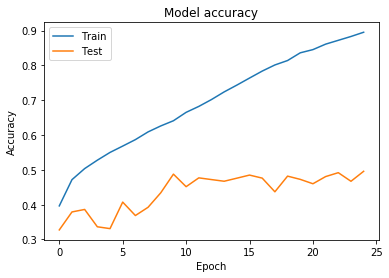

In [8]:
#Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

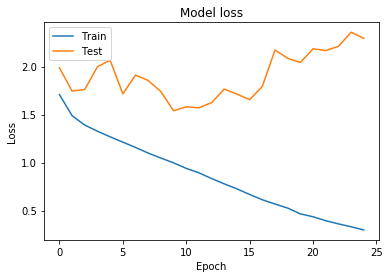

In [9]:
#Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model without BatchNorm layer

In [10]:
model1 = tf.keras.models.Sequential()
model1.add(layers.Dense(1024, input_dim = 3072 , activation = 'relu'))
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(256, activation = 'relu'))
model1.add(layers.Dense(128, activation = 'relu'))
model1.add(layers.Dense(10, activation = 'softmax'))

### Compile the model with optimizer

In [11]:
log_dir_latest = "logs/fit_latest/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_latest = tf.keras.callbacks.TensorBoard(log_dir = log_dir_latest, histogram_freq = 1)

model1.compile(optimizer= tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [12]:
history1 = model1.fit(x = X_train, y = Y_train, validation_data = (X_test, Y_test),
                    epochs = 25, callbacks = [tensorboard_callback_latest], batch_size = batch_size)

Epoch 1/25
196/196 [==============================] - 15s 77ms/step - loss: 1.9929 - accuracy: 0.2813 - val_loss: 1.8056 - val_accuracy: 0.3466
Epoch 2/25
196/196 [==============================] - 16s 81ms/step - loss: 1.7262 - accuracy: 0.3793 - val_loss: 1.6796 - val_accuracy: 0.3897
Epoch 3/25
196/196 [==============================] - 14s 73ms/step - loss: 1.6240 - accuracy: 0.4198 - val_loss: 1.6144 - val_accuracy: 0.4235
Epoch 4/25
196/196 [==============================] - 16s 80ms/step - loss: 1.5568 - accuracy: 0.4440 - val_loss: 1.5276 - val_accuracy: 0.4540
Epoch 5/25
196/196 [==============================] - 14s 71ms/step - loss: 1.5093 - accuracy: 0.4595 - val_loss: 1.5148 - val_accuracy: 0.4574
Epoch 6/25
196/196 [==============================] - 13s 65ms/step - loss: 1.4658 - accuracy: 0.4774 - val_loss: 1.4633 - val_accuracy: 0.4778
Epoch 7/25
196/196 [==============================] - 12s 60ms/step - loss: 1.4305 - accuracy: 0.4898 - val_loss: 1.5020 - val_accuracy:

### Plotting Accuracy and Loss Graphs

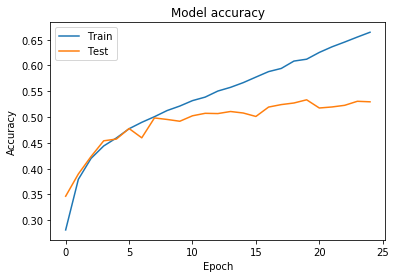

In [13]:
#Accuracy Graph
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

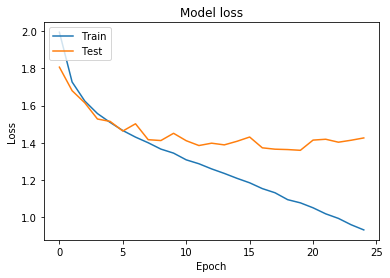

In [14]:
#Loss Graph
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## As we compare the stats of loss going down between the two models, we clearly see that BatchNorm model reached a final loss of 0.30 at the end of 25 epochs whereas the Non-BatchNorm model reached a final loss of just 0.93

## The BatchNorm model reached the loss of 0.93 at around 11th epoch only, which brings us to a conclusion that Model with BatchNorm trains faster.

## Note: Here we demonstrate only the affect of BatchNorm, and not focusing on improving the overall test_accuracy which can be done by adding proper Regularization and Augmentation in a CNN approach network